In [1]:
# magic incantation to make the notebook wider
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [2]:
#magic incantation to make all text in LaTeX font:
from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
import numpy as np
import pylab as pl
import os, sys
%matplotlib inline

import new_functions as fn
fn = reload(fn)

# XMAX = 200
# XMIN = 50
# YMAX = 200
# YMIN = 50

XMAX = 256
XMIN = 0
YMAX = 256
YMIN = 0

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
timepix_data_dir_ir = '/Users/mfisherlevine/Downloads/160808_usaf1/'


dirs = [timepix_data_dir_ir + _ for _ in os.listdir(timepix_data_dir_ir) if _.find('.DS')==-1]
tp_datafiles_ir = []
for this_dir in dirs:
    tp_datafiles_ir.extend([os.path.join(this_dir, _) for _ in os.listdir(this_dir) if _.find('.DS')==-1])
print 'Found %s datafiles in run %s'%(len(tp_datafiles_ir), timepix_data_dir_ir)


Found 200000 datafiles in run /Users/mfisherlevine/Downloads/160808_usaf1/


In [5]:
tp_data_ir = dict.fromkeys(tp_datafiles_ir)


In [7]:



n_files_loaded = 0
for filename in tp_datafiles_ir:
    if n_files_loaded%1000==0: print 'Processed %s files'%n_files_loaded; sys.stdout.flush()
    n_codes = fn.Get_n_timecodesFromFile(filename)
#     if not filename in tp_data_ir.keys():
    tp_data_ir[filename] = {}
    tp_data_ir[filename]['n_codes'] = n_codes
    tp_data_ir[filename]['filename'] = filename
#     else:
#         print 'Would have overwritten bunchID %s'%bunchID
    n_files_loaded += 1

print '*****\nLoaded %s files' %n_files_loaded



Processed 0 files
Processed 1000 files
Processed 2000 files
Processed 3000 files
Processed 4000 files
Processed 5000 files
Processed 6000 files
Processed 7000 files
Processed 8000 files
Processed 9000 files
Processed 10000 files
Processed 11000 files
Processed 12000 files
Processed 13000 files
Processed 14000 files
Processed 15000 files
Processed 16000 files
Processed 17000 files
Processed 18000 files
Processed 19000 files
Processed 20000 files
Processed 21000 files
Processed 22000 files
Processed 23000 files
Processed 24000 files
Processed 25000 files
Processed 26000 files
Processed 27000 files
Processed 28000 files
Processed 29000 files
Processed 30000 files
Processed 31000 files
Processed 32000 files
Processed 33000 files
Processed 34000 files
Processed 35000 files
Processed 36000 files
Processed 37000 files
Processed 38000 files
Processed 39000 files
Processed 40000 files
Processed 41000 files
Processed 42000 files
Processed 43000 files
Processed 44000 files
Processed 45000 files
P

In [ ]:
fn = reload(fn)

# fn.ShowClusteredImage('/Users/mfisherlevine/Downloads/160721_voltages1/160721_v9/160721_v9_0250.txt',257)
fn.ShowClusteredImage(tp_datafiles_ir[0],257,skiplines=1)

In [8]:
fn = reload(fn)
import time

# NB These are different units!
TCUT = 257 #Raw timecode cut for centroiding
# TZERO = 1700 #Time, in ns, after inversion and conversion, to set as t0
TZERO = 0 #Time, in ns, after inversion and conversion, to set as t0

run_id = 'tcut%s_tzero%s'%(TCUT, TZERO)

now = time.time()
for i, filename in enumerate(tp_data_ir.keys()):
    if i%500==0:print 'Centroided %s frames'%i; sys.stdout.flush()

    filename = tp_data_ir[filename]['filename']
    dummy, xs, ys, ts, npixs = fn.GetCentroidsXYTFromFile(filename, TCUT,winow_xmax=XMAX,winow_xmin=XMIN,winow_ymax=YMAX,winow_ymin=YMIN,skiplines=1)#, gating=[8400,8])
    tp_data_ir[filename]['xs'] = xs
    tp_data_ir[filename]['ys'] = ys
#         tp_data[filename]['ts'] = [(_-TZERO)*20 for _ in ts]#already inverted, just translate to ns
    tp_data_ir[filename]['ts'] = [(_-TZERO) for _ in ts]#already inverted, just translate to ns
    tp_data_ir[filename]['npixs'] = npixs
    tp_data_ir[filename]['n_ions'] = len(xs)
print 'Finished IR'


Centroided 0 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_37_27_552.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_44_42_220.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_40_15_515.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_25_48_169.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_11_01_366.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_23_35_222.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_41_17_189.txt - TCUT = 257
Centroided 1000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_16_25_455.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_39_25_035.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_08_42_022.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 1500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_06_17_818.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_54_04_775.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_47_23_680.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_05_50_230.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_29_31_727.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_09_58_997.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_12_45_745.txt - TCUT = 257
Centroided 2000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_54_08_973.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_20_16_877.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_10_04_207.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 2500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_32_02_955.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_00_30_566.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_59_11_664.txt - TCUT = 257
Centroided 3000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_54_42_932.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_44_35_545.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_34_00_415.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_22_13_923.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_45_31_184.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_37_40_487.txt - TCUT = 257
Centroided 3500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_36_17_036.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_03_12_753.txt - TCUT = 257
Centroided 4000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_59_48_135.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_26_35_233.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_17_18_033.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 4500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_32_51_166.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_47_48_165.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_54_41_910.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_48_40_836.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_44_18_627.txt - TCUT = 257
Centroided 5000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_31_33_288.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_57_27_683.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_15_01_169.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_19_14_479.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_54_46_714.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/0

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_11_01_737.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_04_15_452.txt - TCUT = 257
Centroided 7500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_20_21_998.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_41_56_043.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_41_59_276.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 8000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_28_02_965.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_20_38_988.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_50_44_327.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_26_26_637.txt - TCUT = 257
Centroided 8500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_05_17_459.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 9000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_51_37_907.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_18_49_313.txt - TCUT = 257
Centroided 9500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_07_05_389.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_16_35_800.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_34_33_711.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_11_51_679.txt - TCUT = 257
Centroided 10000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_37_09_756.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_00_33_932.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_22_24_688.txt - TCUT = 257
Centroided 10500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_33_50_841.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_06_41_008.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_56_34_950.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_59_05_942.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_34_45_098.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_44_18_046.txt - TCUT = 257
Centroided 11000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_39_43_267.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_41_24_520.txt - TCUT = 257
Centroided 11500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_50_33_093.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_41_26_665.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_26_59_588.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_05_12_642.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_25_04_405.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_36_52_751.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_44_57_944.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 12000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_56_17_074.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_15_34_073.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_21_01_723.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_20_36_333.txt - TCUT = 257
Centroided 12500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_50_09_435.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_20_41_329.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_28_45_227.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_43_18_470.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_03_06_148.txt - TCUT = 257
Centroided 13000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_18_54_619.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_04_949.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_59_11_857.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_27_00_802.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_19_21_241.txt - TCUT = 257
Centroided 13500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_52_32_618.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_34_02_901.txt - TCUT = 257
Centroided 14000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_15_08_133.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_46_48_376.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_12_30_720.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_20_09_888.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_06_45_460.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_06_54_743.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_09_04_916.txt - TCUT = 257
Centroided 14500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_30_42_056.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_49_18_669.txt - TCUT = 257
Centroided 15000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_50_02_347.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_55_46_801.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_46_53_918.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_20_39_415.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_26_15_933.txt - TCUT = 257
Centroided 15500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_35_33_924.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_44_45_898.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_19_33_875.txt - TCUT = 257
Centroided 16000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_09_04_425.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_13_26_300.txt - TCUT = 257
Centroided 16500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_55_59_430.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_47_29_687.txt - TCUT = 257
Centroided 17000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_34_44_390.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_48_10_462.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_10_00_900.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_36_14_547.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_58_45_279.txt - TCUT = 257
Centroided 17500 frames
Found 1 clusters

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_25_55_456.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_02_29_306.txt - TCUT = 257
Centroided 18000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_39_37_522.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_11_14_473.txt - TCUT = 257
Centroided 18500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_49_11_172.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_19_20_398.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_57_26_456.txt - TCUT = 257
Centroided 19000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_22_36_908.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_01_05_632.txt - TCUT = 257
Centroided 19500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_17_02_671.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_47_39_353.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_26_48_017.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_02_26_525.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_34_00_109.txt - TCUT = 257
Centroided 20000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_50_04_404.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_59_22_351.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_42_14_392.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_21_10_892.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 20500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_10_50_972.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_57_23_574.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_28_09_110.txt - TCUT = 257
Centroided 21000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_44_32_098.txt - TCUT = 257
Centroided 21500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_18_21_071.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_38_50_452.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 22000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_04_03_007.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_18_41_880.txt - TCUT = 257
Centroided 22500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_58_06_753.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_19_55_227.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_50_34_211.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_39_12_892.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 23000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_16_29_966.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_34_01_821.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_02_54_231.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_02_20_419.txt - TCUT = 257
Centroided 23500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_12_02_071.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_05_56_389.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_13_29_071.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_31_44_171.txt - TCUT = 257
Centroided 24000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_42_53_458.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_59_14_336.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 24500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_53_56_513.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_17_57_956.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_17_24_422.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_55_11_844.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_56_51_818.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 25000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_57_08_097.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_14_32_722.txt - TCUT = 257
Centroided 25500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_15_19_681.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_52_54_399.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_51_25_657.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_14_59_533.txt - TCUT = 257
Centroided 26000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_56_59_348.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_27_11_691.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_00_44_264.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_22_14_702.txt - TCUT = 257
Centroided 26500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_25_35_598.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_55_14_653.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_01_37_739.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_44_30_089.txt - TCUT = 257
Centroided 27000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_30_17_086.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_46_40_969.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_59_51_825.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_34_50_422.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_28_14_630.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_33_39_833.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_33_37_019.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_13_21_767.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_53_06_888.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_51_12_927.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_11_49_478.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_48_38_588.txt - TCUT = 257
Centroided 28500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_52_56_055.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_41_15_301.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_03_08_320.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_09_55_328.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_22_53_424.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_57_38_513.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_45_01_169.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_58_17_923.txt - TCUT = 257
Centroided 29000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_15_20_087.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_14_29_036.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_37_15_213.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 29500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_35_48_045.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_14_56_229.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_17_56_942.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_32_18_604.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_12_32_356.txt - TCUT = 257
Centroided 30000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_23_00_187.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_25_07_540.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_29_53_443.txt - TCUT = 257
Centroided 30500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_50_06_415.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_50_38_615.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_46_44_501.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_15_44_342.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_55_20_911.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_08_17_286.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 31000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_07_00_420.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_28_52_968.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_47_43_723.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_45_54_885.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_19_14_751.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_27_34_374.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 31500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_03_03_123.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_27_11_023.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_25_54_706.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 32000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_32_26_524.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_18_49_473.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 32500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_20_01_781.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_12_28_212.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_57_20_335.txt - TCUT = 257
Centroided 33000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_37_56_576.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_59_06_654.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_43_38_333.txt - TCUT = 257
Centroided 33500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_54_32_435.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_06_23_229.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_05_21_101.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 34000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_57_46_650.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_26_01_831.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_41_02_246.txt - TCUT = 257
Centroided 34500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_59_14_230.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_45_14_722.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_53_49_103.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_51_16_230.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_23_49_043.txt - TCUT = 257
Centroided 35000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_17_55_982.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_14_39_983.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_53_22_621.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 35500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_21_47_745.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_19_54_180.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_02_49_701.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_26_01_613.txt - TCUT = 257
Centroided 36000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_26_35_045.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_47_54_689.txt - TCUT = 257
Centroided 36500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_39_45_223.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_03_39_687.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_23_18_948.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_04_31_014.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_39_42_786.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_36_24_398.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_53_22_474.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_38_25_202.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 37000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_03_05_975.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_10_34_125.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_21_27_944.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_10_26_537.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_32_04_807.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_24_10_394.txt - TCUT = 257
Centroided 37500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_59_47_973.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_25_00_769.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_34_10_085.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_22_29_665.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_34_41_053.txt - TCUT = 257
Centroided 38000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_49_11_907.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_41_55_498.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_55_14_955.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_40_57_011.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_00_17_644.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_16_21_816.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_42_08_581.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 38500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_45_53_381.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_05_50_321.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 39000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_57_02_639.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_14_55_613.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_46_57_374.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 39500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_11_56_976.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_47_55_475.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_53_43_987.txt - TCUT = 257
Centroided 40000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_08_32_815.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_16_26_691.txt - TCUT = 257
Centroided 40500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_59_30_444.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_32_703.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_54_29_984.txt - TCUT = 257
Centroided 41000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_55_38_945.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_43_24_263.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_57_12_684.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_06_35_101.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_56_48_215.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 41500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_22_30_919.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_09_43_782.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_26_52_354.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_16_02_602.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_37_05_652.txt - TCUT = 257
Centroided 42000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_20_966.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_07_30_203.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_31_29_539.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_30_16_821.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_49_53_435.txt - TCUT = 257
Centroided 42500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_24_37_980.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_03_26_192.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_19_19_985.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 43000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_06_14_394.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_23_09_143.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_25_24_893.txt - TCUT = 257
Centroided 43500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_42_22_348.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_24_31_997.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_49_42_256.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_40_09_802.txt - TCUT = 257
Centroided 44000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_18_24_769.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_37_40_184.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 44500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_58_10_443.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_02_31_935.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_24_24_862.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_55_56_364.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 45000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_27_15_342.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_07_34_041.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_02_41_875.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_59_59_111.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_06_02_713.txt - TCUT = 257
Centroided 45500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_05_05_446.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_22_47_730.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_16_15_259.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_32_54_715.txt - TCUT = 257
Centroided 46000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_48_57_559.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_44_18_549.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_19_03_307.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_03_41_106.txt - TCUT = 257
Centroided 48500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_39_11_304.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_39_11_334.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 49000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_57_00_250.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_10_31_496.txt - TCUT = 257
Centroided 49500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_42_51_022.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_22_02_235.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_07_19_550.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_16_14_765.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_07_32_828.txt - TCUT = 257
Centroided 50000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_41_38_024.txt - TCUT = 257
Centroided 50500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_15_02_698.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_19_16_336.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 51000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_55_20_631.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_08_52_792.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_41_06_180.txt - TCUT = 257
Centroided 51500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_47_277.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_42_50_553.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_20_16_886.txt - TCUT = 257
Centroided 52000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_14_32_713.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_06_38_812.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_19_05_765.txt - TCUT = 257
Centroided 52500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_04_42_445.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_17_38_704.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_08_34_720.txt - TCUT = 257
Centroided 53000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_09_47_780.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_56_27_854.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_48_16_721.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_20_34_686.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_18_30_606.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_17_50_328.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_19_56_421.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_38_42_678.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 53500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_45_19_645.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_06_48_100.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_33_09_574.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 54000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_17_26_341.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_01_03_235.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_16_01_207.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_09_04_299.txt - TCUT = 257
Centroided 54500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_18_24_595.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_11_26_933.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_28_20_793.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_22_46_553.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_59_57_811.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_34_32_577.txt - TCUT = 257
Centroided 55000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_30_17_329.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_22_44_936.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_15_59_581.txt - TCUT = 257
Centroided 55500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_41_19_684.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_13_36_366.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_46_11_302.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_25_17_115.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_40_33_873.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_01_43_952.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 56000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_28_35_753.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_59_15_102.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_04_45_408.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_48_37_965.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_23_19_122.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_33_52_621.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_51_07_432.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_43_51_027.txt - TCUT = 257
Centroided 56500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_56_27_395.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_51_59_118.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_14_15_984.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_44_42_031.txt - TCUT = 257
Centroided 57000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_42_20_033.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_16_56_078.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_49_35_871.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_16_13_214.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_49_33_195.txt - TCUT = 257
Centroided 57500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_47_57_444.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_56_45_325.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_44_19_612.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_33_23_913.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 58000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_27_29_940.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_53_16_578.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_17_39_443.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_24_21_789.txt - TCUT = 257
Centroided 58500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_32_36_587.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_55_08_542.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_13_54_030.txt - TCUT = 257
Centroided 59000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_46_18_094.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_38_07_959.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_22_56_141.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 59500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_46_05_426.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_50_16_655.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_17_12_197.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_47_59_812.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 60000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_10_26_514.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_37_17_883.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_32_38_107.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_17_59_671.txt - TCUT = 257
Centroided 60500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_12_54_885.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_11_08_645.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_30_08_835.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_31_06_952.txt - TCUT = 257
Centroided 61000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_59_40_712.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_36_32_730.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_28_59_481.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_46_22_004.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_04_39_244.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_06_46_398.txt - TCUT = 257
Centroided 61500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_08_11_304.txt - TCUT = 257
Centroided 62000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_52_31_545.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_45_50_211.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_08_699.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 62500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_16_14_291.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_32_37_584.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_59_42_057.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_11_32_498.txt - TCUT = 257
Centroided 63000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_02_00_721.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_46_31_034.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_09_11_175.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_58_38_903.txt - TCUT = 257
Centroided 63500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_39_12_094.txt - TCUT = 257
Centroided 64000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_16_02_684.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_40_29_572.txt - TCUT = 257
Found 1 clusters

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_59_29_593.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_29_36_293.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_28_56_307.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_05_33_010.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_11_06_967.txt - TCUT = 257
Centroided 65000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_00_09_030.txt - TCUT = 257
Centroided 65500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_21_08_172.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_35_43_461.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_15_47_562.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_24_28_817.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_48_09_549.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_05_38_973.txt - TCUT = 257
Centroided 66000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_14_08_515.txt - TCUT = 257
Centroided 66500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_02_06_457.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_26_03_928.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_16_53_341.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_06_02_840.txt - TCUT = 257
Centroided 67000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_35_53_153.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_22_36_374.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_02_49_494.txt - TCUT = 257
Centroided 67500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_41_17_441.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_06_01_422.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_18_42_806.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 68000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_35_06_593.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_43_50_593.txt - TCUT = 257
Centroided 68500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_10_06_597.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_23_44_363.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_10_31_065.txt - TCUT = 257
Centroided 69000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_50_33_173.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_52_28_234.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_00_37_144.txt - TCUT = 257
Found 1 clusters

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_14_45_113.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_01_27_336.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_42_26_564.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_28_09_294.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_51_44_244.txt - TCUT = 257
Centroided 70000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_13_23_447.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_47_08_120.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_07_40_154.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_11_40_574.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_35_28_392.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_36_51_910.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 70500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_43_56_360.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_18_05_647.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_16_14_945.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_13_57_288.txt - TCUT = 257
Centroided 71000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_57_05_828.txt - TCUT = 257
Centroided 71500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_37_52_773.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_46_25_098.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_11_05_880.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_19_21_159.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_37_47_904.txt"
  w

Centroided 72000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_45_35_867.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_16_46_909.txt - TCUT = 257
Centroided 72500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_19_03_592.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_20_33_028.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 73000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_59_21_392.txt - TCUT = 257
Centroided 73500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_05_31_295.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_27_23_481.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_45_09_655.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_10_04_676.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_47_18_943.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 74000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_41_26_203.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_20_41_419.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 74500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_48_23_680.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_54_43_954.txt - TCUT = 257
Centroided 75000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_48_03_036.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_15_25_869.txt - TCUT = 257
Centroided 75500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_37_18_991.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_44_32_119.txt - TCUT = 257
Centroided 76000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_40_39_653.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_32_50_617.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_24_25_371.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 76500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_52_58_745.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_45_31_165.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_38_23_631.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_51_55_013.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 77000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_57_08_239.txt - TCUT = 257
Centroided 77500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_19_32_708.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_09_47_041.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_03_57_691.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_48_48_083.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_17_12_565.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_32_44_887.txt - TCUT = 257
Centroided 78000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_01_11_028.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_08_16_491.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_35_40_959.txt - TCUT = 257
Centroided 78500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_36_20_184.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_01_20_130.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_00_52_648.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_21_10_100.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_02_17_473.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 79000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_02_02_473.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_06_47_467.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_30_27_700.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_41_06_172.txt"
  w

Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_33_52_703.txt - TCUT = 257
Centroided 79500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_43_12_481.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 80000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_40_53_432.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_21_46_916.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_07_42_888.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_22_51_411.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_46_56_281.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_00_19_144.txt - TCUT = 257
Centroided 80500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_00_50_791.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_27_10_453.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_42_52_015.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_13_26_075.txt - TCUT = 257
Centroided 81000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_48_19_360.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_50_30_484.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_37_13_100.txt - TCUT = 257
Centroided 81500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_41_27_441.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_45_29_926.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_14_05_735.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_23_31_965.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_30_35_875.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_49_52_354.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_10_34_799.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_33_16_726.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_46_45_942.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 82000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_30_48_171.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_42_49_886.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_05_30_165.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_58_42_056.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 82500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_54_43_128.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_13_44_692.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_19_34_354.txt - TCUT = 257
Centroided 83000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_03_45_514.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_23_03_041.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_23_49_856.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_41_37_248.txt - TCUT = 257
Centroided 83500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_52_47_568.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_48_28_019.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_03_42_636.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 84000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_31_11_741.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_12_04_183.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_33_41_519.txt - TCUT = 257
Centroided 84500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_24_35_143.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 85000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_32_07_007.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_42_04_920.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_37_04_964.txt - TCUT = 257
Centroided 85500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_39_43_158.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_26_57_465.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_03_21_271.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_01_05_976.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 86000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_07_32_779.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_53_18_839.txt - TCUT = 257
Centroided 86500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_48_39_626.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_08_36_866.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_39_15_995.txt - TCUT = 257
Centroided 87000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_15_50_712.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_18_44_176.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_41_06_727.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 87500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_32_40_489.txt - TCUT = 257
Centroided 88000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_08_18_126.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_14_12_245.txt - TCUT = 257
Centroided 88500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_27_18_582.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_51_07_953.txt - TCUT = 257
Centroided 89000 frames
Centroided 89500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_03_14_215.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_40_19_493.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_23_20_855.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_45_11_091.txt - TCUT = 257
Centroided 90000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_55_07_641.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_25_42_183.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_59_01_436.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_55_22_750.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_47_32_611.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_32_16_381.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_52_55_563.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_27_01_753.txt - TCUT = 257
Centroided 90500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_09_35_769.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_12_37_657.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_31_04_530.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_09_31_981.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_44_19_724.txt - TCUT = 257
Centroided 91000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_10_03_299.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_41_06_821.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_11_38_588.txt - TCUT = 257
Centroided 91500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_53_23_941.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_09_18_486.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_51_25_452.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_50_05_083.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_07_11_560.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_07_45_660.txt - TCUT = 257
Centroided 92000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_05_08_529.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_17_32_790.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_20_53_818.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_50_44_601.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_38_24_175.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_31_49_428.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_49_26_949.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 92500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_49_38_002.txt - TCUT = 257
Centroided 93000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_52_18_104.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_13_42_038.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_49_14_752.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 93500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_49_03_485.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_50_03_041.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_36_44_892.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_32_47_274.txt - TCUT = 257
Centroided 94000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_21_36_636.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_30_49_417.txt - TCUT = 257
Centroided 94500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_22_32_509.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_00_04_290.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_53_18_265.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_01_42_779.txt - TCUT = 257
Centroided 95000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_49_34_579.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_44_20_632.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_23_59_999.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_38_23_274.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_13_29_188.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_53_05_078.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_27_49_402.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_34_49_234.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_19_22_446.txt - TCUT = 257
Centroided 95500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_31_00_478.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_37_58_100.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_23_47_628.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_34_09_892.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_33_28_844.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_25_49_757.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_27_27_356.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_08_42_784.txt - TCUT = 257
Centroided 96000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_51_49_238.txt - TCUT = 257
Centroided 96500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_51_15_045.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_23_25_717.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_16_17_209.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_41_00_501.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_06_51_013.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_00_09_035.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_45_49_667.txt - TCUT = 257
Centroided 97000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_07_43_970.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_07_50_764.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_35_38_528.txt - TCUT = 257
Centroided 97500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_21_02_818.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_44_25_280.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_15_02_751.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_52_59_138.txt - TCUT = 257
Centroided 98000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_10_770.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_54_24_424.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_15_01_393.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_34_42_986.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 98500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_43_168.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_06_45_902.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_42_40_445.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 99000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_58_55_147.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_01_24_428.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_11_28_816.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_05_37_665.txt - TCUT = 257
Centroided 99500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_56_12_922.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_00_56_254.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_39_38_417.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_42_46_490.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 100000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_52_24_659.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_08_03_697.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_29_40_136.txt - TCUT = 257
Centroided 100500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_16_886.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_58_11_898.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_05_10_767.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 101000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_41_38_514.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 101500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_26_41_784.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_58_32_390.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_43_35_257.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_05_41_903.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_31_10_834.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_05_50_184.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_27_05_801.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_37_35_551.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_26_06_981.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 102000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_13_40_690.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_54_36_143.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 102500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_27_36_479.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_46_16_757.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_16_50_285.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_09_27_157.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 103000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_13_01_895.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_14_42_026.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_28_50_058.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_46_21_683.txt - TCUT = 257
Centroided 103500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_55_09_082.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_04_51_142.txt - TCUT = 257
Centroided 104000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_56_20_176.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_28_51_663.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_24_26_361.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_01_21_280.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_15_51_413.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 104500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_55_24_841.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_18_14_032.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_16_42_798.txt - TCUT = 257
Centroided 105000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_12_06_678.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_53_06_783.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_55_37_095.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_26_36_776.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_59_41_804.txt - TCUT = 257
Centroided 105500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_18_39_602.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_50_21_005.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_33_55_523.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_00_24_976.txt - TCUT = 257
Centroided 106000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_00_50_380.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_32_50_894.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_45_38_059.txt - TCUT = 257
Centroided 106500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_30_09_712.txt - TCUT = 257
Centroided 107000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_00_48_855.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_00_56_993.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_41_54_763.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_47_51_874.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_10_22_701.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_01_02_661.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_44_04_166.txt - TCUT = 257
Centroided 107500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_54_57_738.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_46_00_956.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_02_08_430.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_56_03_997.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_08_40_671.txt - TCUT = 257
Centroided 108000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_24_58_096.txt - TCUT = 257
Centroided 108500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_15_01_957.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_19_00_111.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_59_00_627.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 109000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_11_52_482.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_56_13_858.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_38_22_238.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_19_10_217.txt - TCUT = 257
Centroided 109500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_20_42_546.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 110000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_02_08_908.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_42_50_845.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_12_49_287.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_44_38_726.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 110500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_31_34_272.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_25_11_181.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_07_45_109.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_33_30_683.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_00_57_496.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_19_49_823.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 111000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_47_37_776.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_04_57_050.txt - TCUT = 257
Centroided 111500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_05_04_272.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_54_19_614.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_03_16_566.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_28_20_977.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_10_29_453.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_49_23_250.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_18_22_066.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_45_33_112.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 112000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_00_40_672.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_21_17_273.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_24_12_564.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 112500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_14_59_046.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_30_51_099.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_58_35_820.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_45_43_011.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_35_17_282.txt - TCUT = 257
Centroided 113000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_07_29_829.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_15_30_827.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_22_15_924.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_52_21_906.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 113500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_54_36_693.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_21_33_244.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_22_40_309.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_32_38_727.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_31_23_354.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 114000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_55_17_327.txt - TCUT = 257
Centroided 114500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_29_51_138.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_53_14_673.txt - TCUT = 257
Centroided 115000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_04_33_520.txt - TCUT = 257
Centroided 115500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_19_38_337.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_52_24_851.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_52_55_913.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_00_18_708.txt -

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_22_47_915.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_12_48_090.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_59_12_936.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 117000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_53_41_324.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_56_58_173.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_53_40_681.txt - TCUT = 257
Centroided 117500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_55_40_781.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_40_49_195.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_21_28_311.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_24_48_073.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_04_29_784.txt - TCUT = 257
Centroided 118000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_45_01_681.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_42_03_051.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_39_36_287.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_16_24_928.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_14_32_791.txt - TCUT = 257
Centroided 118500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_05_48_511.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_37_08_774.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_06_23_868.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_31_18_190.txt - TCUT = 257
Centroided 119000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_58_26_224.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_24_36_573.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_09_23_785.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_17_03_829.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 119500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_37_24_485.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_27_35_815.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_53_24_132.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 120000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_06_48_523.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_14_10_937.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_15_32_457.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_22_38_874.txt - TCUT = 257
Centroided 120500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_53_50_553.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_50_14_403.txt - TCUT = 257
Centroided 121000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_38_56_049.txt - TCUT = 257
Centroided 121500 frames
Centroided 122000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_10_03_507.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_16_09_494.txt - TCUT = 257
Centroided 122500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_56_07_869.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_38_02_183.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_08_07_684.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_01_18_233.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_21_03_480.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_48_25_090.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 123500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_23_36_883.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_27_32_057.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_36_44_802.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_01_44_038.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_09_47_234.txt - TCUT = 257
Centroided 124000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_35_54_181.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_53_17_592.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_06_59_779.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 124500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_10_53_652.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_58_22_712.txt - TCUT = 257
Centroided 125000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_10_36_408.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_43_18_835.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_00_12_787.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_55_16_857.txt - TCUT = 257
Centroided 125500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_03_25_653.txt - TCUT = 257
Centroided 126000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_00_06_840.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 126500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_33_33_537.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_09_51_181.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_56_35_136.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_03_38_397.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_23_21_339.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_01_31_778.txt - TCUT = 257
Centroided 127000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_17_35_288.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 127500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_08_22_343.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_10_09_999.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_07_25_449.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_04_17_565.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 128000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_14_19_288.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_07_38_757.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_20_20_630.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 128500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_35_56_619.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_14_58_900.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_07_44_083.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_22_07_942.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_02_40_737.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_10_40_080.txt - TCUT = 257
Centroided 129000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_36_33_783.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_45_07_784.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_29_48_496.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_53_28_970.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 129500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_51_48_972.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_14_41_341.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_43_53_567.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_17_35_930.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_23_57_861.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_58_53_917.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_30_10_909.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_25_33_208.txt - TCUT = 257
Centroided 130000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_04_05_079.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_55_34_123.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_20_26_576.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_41_08_101.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_01_51_751.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 130500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_42_43_935.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_02_43_261.txt - TCUT = 257
Centroided 131000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_19_45_355.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_08_23_063.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_31_52_802.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_00_08_285.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_56_25_237.txt - TCUT = 257
Centroided 131500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_31_05_361.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_25_34_862.txt - TCUT = 257
Centroided 132000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_47_02_643.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_31_36_562.txt - TCUT = 257
Centroided 132500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_53_07_410.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_52_37_391.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_20_50_759.txt - TCUT = 257
Centroided 133000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_10_46_705.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_54_00_705.txt - TCUT = 257
Centroided 13

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_29_22_970.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 135000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_19_39_117.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_45_29_997.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_29_30_699.txt - TCUT = 257
Centroided 135500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_37_36_211.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_19_22_470.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_37_06_448.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 136000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_45_55_859.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_14_06_956.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_08_11_583.txt - TCUT = 257
Centroided 136500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_04_16_896.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_00_52_469.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_53_24_814.txt - TCUT = 257
Centroided 137000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_08_23_633.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_08_12_247.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_48_16_183.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_04_44_923.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_45_40_521.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_16_04_792.txt - TCUT = 257
Centroided 137500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_05_06_137.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_27_16_887.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_08_30_100.txt - TCUT = 257
Centroided 138000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_16_14_382.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 138500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_13_03_731.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_15_36_264.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 139000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_04_41_189.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_38_14_536.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_46_40_976.txt - TCUT = 257
Centroided 139500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_18_00_390.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_17_08_203.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_53_22_445.txt - TCUT = 257
Centroided 140000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_26_52_031.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_23_46_682.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_45_31_814.txt - TCUT = 257
Centroided 140500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_51_13_420.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_52_51_493.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_10_55_594.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_25_33_976.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_21_36_770.txt - TCUT = 257
Centroided 141000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_25_52_583.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_09_13_982.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_47_42_839.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_26_46_065.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_36_19_411.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 141500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_47_27_376.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_57_50_755.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_38_30_164.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_27_26_273.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 142000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_59_39_417.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_41_26_304.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_27_43_892.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_45_35_779.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_27_59_811.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_25_45_585.txt - TCUT = 257
Centroided 142500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_16_15_779.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_17_05_763.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevi

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_38_14_541.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 144500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_12_38_040.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_04_21_990.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_35_01_976.txt - TCUT = 257
Centroided 145000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_14_40_484.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_30_08_369.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_14_55_042.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_48_57_764.txt - TCUT = 257
Centroided 145500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_37_36_300.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_56_14_248.txt - TCUT = 257
Centroided 146000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_28_58_022.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_00_14_025.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_13_15_285.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_24_17_594.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_18_04_500.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 146500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_51_45_113.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_35_57_651.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_47_14_455.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_57_44_423.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_08_51_849.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 147000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_05_26_173.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_04_18_822.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_24_47_265.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_11_56_484.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_25_07_974.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_38_47_184.txt - TCUT = 257
Centroided 147500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_16_41_950.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_26_17_827.txt - TCUT = 257
Centroided 148000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_39_57_123.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_00_30_188.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_42_18_537.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_46_57_507.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_09_46_843.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_15_59_842.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_50_03_045.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_29_40_239.txt - TCUT = 257
Centroided 148500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_17_32_348.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_47_27_546.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_03_16_832.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_16_01_316.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_46_01_822.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_45_18_082.txt - TCUT = 257
Centroided 149000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_09_44_205.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_56_32_853.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_32_40_379.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_14_25_526.txt - TCUT = 257
Centroided 149500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_12_15_280.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_46_36_298.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_15_45_362.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_59_51_268.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 150000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_49_25_411.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_19_44_734.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_44_41_559.txt - TCUT = 257
Centroided 150500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_24_18_145.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_07_05_869.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_57_44_159.txt - TCUT = 257
Centroided 151000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_57_36_931.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_07_26_357.txt - TCUT = 257
Centroided 151500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_51_59_832.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_07_29_421.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_17_26_432.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_53_03_811.txt - TCUT = 257
Centroided 152000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_40_46_946.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_12_49_100.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 152500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_01_02_854.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_20_08_349.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_41_01_853.txt - TCUT = 257
Centroided 153000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_17_34_812.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_21_47_900.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_17_17_400.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 153500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_17_53_336.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 154000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_32_59_709.txt - TCUT = 257
Centroided 154500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_32_25_704.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_59_05_428.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_34_54_790.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_00_48_996.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_54_00_186.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 155000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_54_15_753.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_45_38_090.txt - TCUT = 257
Centroided 155500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_17_34_576.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_55_37_611.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_37_30_348.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 156000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_05_30_865.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_58_16_984.txt - TCUT = 257
Centroided 156500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_25_22_563.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_02_37_110.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_41_59_969.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_26_52_878.txt - TCUT = 257
Centroided 157000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_31_07_072.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_52_59_382.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_27_19_950.txt - TCUT = 257
Centroided 157500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_37_58_874.txt - TCUT = 257
Centroided 158000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_48_14_339.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_35_41_722.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_07_26_532.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_11_20_812.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 158500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_23_56_245.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_25_52_524.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_08_32_159.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_25_00_099.txt - TCUT = 257
Centroided 159000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_42_56_524.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_28_14_180.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_27_52_601.txt - TCUT = 257
Centroided 159500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_39_03_611.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_09_48_444.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_59_12_664.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_39_26_889.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_55_07_930.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 160000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_15_38_418.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_35_09_820.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_19_50_398.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_43_29_925.txt - TCUT = 257
Centroided 160500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_18_23_940.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_24_30_569.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_18_06_922.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_09_56_372.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_04_27_214.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_43_06_761.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_07_56_734.txt - TCUT = 257
Centroided 161000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_12_11_899.txt - TCUT = 257
Centroided 161500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_09_51_791.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevi

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_56_46_060.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_15_18_507.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_10_38_926.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_20_08_285.txt - TCUT = 257
Centroided 162000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_30_47_276.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_19_16_250.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_59_37_681.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_03_01_699.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 162500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_47_25_202.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_37_04_792.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_19_46_605.txt - TCUT = 257
Centroided 163000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_10_30_033.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_12_14_333.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_26_20_746.txt - TCUT = 257
Centroided 163500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_54_17_265.txt - TCUT = 257
Centroided 164000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_54_35_620.txt -

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_30_40_226.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_41_36_926.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_06_29_784.txt - TCUT = 257
Centroided 165000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_37_38_927.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_05_41_270.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 165500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_10_06_990.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_37_20_235.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_32_48_606.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_08_48_328.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_17_50_787.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_00_49_713.txt - TCUT = 257
Centroided 166000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_20_24_251.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_17_50_789.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_08_21_648.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_05_24_339.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_14_19_245.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_48_19_339.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_10_16_395.txt - TCUT = 257
Centroided 166500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_18_03_640.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_54_567.txt - TCUT = 257
Centroided 167000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_13_03_379.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_16_23_378.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_24_37_122.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_29_43_704.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 167500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_45_43_833.txt - TCUT = 257
Centroided 168000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_36_58_479.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_14_54_805.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_00_47_676.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_10_05_438.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_21_40_733.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 168500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_13_50_263.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_55_39_048.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_12_07_941.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_15_42_536.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_36_23_513.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_45_24_674.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_42_09_512.txt - TCUT = 257
Centroided 169000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_25_08_015.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_18_48_798.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 169500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_26_24_337.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_24_24_832.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_05_56_868.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_08_32_846.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_22_59_805.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 170000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_59_00_535.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_53_44_087.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_05_05_776.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_27_14_683.txt - TCUT = 257
Centroided 170500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_57_16_203.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_02_55_938.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_56_59_843.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_13_49_768.txt - TCUT = 257
Centroided 171000 frames
Found 1 clust

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_21_45_162.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_04_58_097.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_48_19_096.txt - TCUT = 257
Centroided 172000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_34_49_946.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_34_21_872.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_25_15_379.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 172500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_53_404.txt - TCUT = 257
Centroided 173000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_08_41_487.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_43_51_031.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_26_37_286.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_07_46_558.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_25_08_522.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_27_41_713.txt - TCUT = 257
Centroided 173500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_15_51_674.txt - TCUT = 257
Found 1 clust

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_20_05_855.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_20_55_776.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_53_20_459.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_00_55_248.txt - TCUT = 257
Centroided 174000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_20_30_730.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_31_09_449.txt - TCUT = 257
Centroided 174500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_39_32_776.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_52_04_246.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_26_31_557.txt - TCUT = 257
Centroided 175000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_02_32_610.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_02_21_283.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 175500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_05_42_113.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_50_55_033.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_36_09_258.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_19_18_484.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_22_42_549.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_56_35_440.txt - TCUT = 257
Centroided 176000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_52_33_804.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_44_53_638.txt - TCUT = 257
Centroided 176500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_04_51_319.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_33_07_998.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 177000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_48_42_108.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_55_11_321.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 177500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_11_24_297.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_14_24_158.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_17_04_627.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_51_03_055.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_05_06_756.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_51_47_349.txt - TCUT = 257
Centroided 178000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_13_37_668.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_12_21_721.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_59_05_158.txt - TCUT = 257
Centroided 178500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_57_13_005.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_14_36_608.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_31_14_543.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_20_30_434.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 179000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_09_01_081.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_04_47_796.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_25_09_659.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_54_00_893.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_01_01_395.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_44_45_699.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_58_39_604.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_29_42_200.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_02_26_764.txt - TCUT = 257
Centroided 179500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_09_34_804.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_07_05_103.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_22_56_366.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_34_33_530.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 180000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_14_23_838.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_33_04_703.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_06_59_027.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_21_45_240.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_00_24_228.txt - TCUT = 257
Centroided 180500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_25_55_340.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_55_02_754.txt - TCUT = 257
Centroided 181000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_05_07_710.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_58_21_875.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_23_57_382.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_07_40_091.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_11_56_307.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_31_17_530.txt - TCUT = 257
Centroided 181500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_15_12_948.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_51_39_336.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 182000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_42_36_451.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_40_46_848.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_41_23_320.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_30_36_241.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_23_17_463.txt"
  w

Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_19_39_912.txt - TCUT = 257
Centroided 182500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_49_58_063.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_24_58_360.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_55_11_926.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 183000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_55_01_647.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_27_27_216.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_17_30_591.txt - TCUT = 257
Centroided 183500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_55_33_831.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_13_17_120.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_29_43_154.txt - TCUT = 257
Centroided 184000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_14_11_407.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_02_27_686.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_12_37_157.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_34_29_573.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_09_53_963.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_10_53_562.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_22_18_190.txt - TCUT = 257
Centroided 184500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_15_33_370.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_51_54_212.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_34_11_926.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_21_09_350.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_37_30_617.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_46_45_671.txt - TCUT = 257
Centroided 185000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_50_51_739.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_19_51_526.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_11_55_175.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_25_24_931.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 185500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_49_46_683.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_18_14_975.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_14_39_626.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_51_25_083.txt - TCUT = 257
Centroided 186000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_18_09_215.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_47_43_235.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_56_57_016.txt - TCUT = 257
Centroided 186500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_54_368.txt - TCUT = 257
Found 1 clust

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_10_04_161.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_02_37_299.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_10_27_099.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_27_03_415.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_25_53_868.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_10_58_274.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_06_40_896.txt - TCUT = 257
Centroided 187500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_42_11_671.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_33_14_156.txt - TCUT = 257
Centroided 188000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_27_34_246.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevi

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_00_08_255.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_17_25_060.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_18_10_001.txt - TCUT = 257
Centroided 188500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_50_46_898.txt - TCUT = 257
Centroided 189000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_49_59_773.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_43_36_310.txt - TCUT = 257
Centroided 189500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_40_10_828.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_51_34_608.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_45_09_281.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 190000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_15_37_428.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_59_39_151.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_46_12_718.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_38_57_439.txt - TCUT = 257
Centroided 190500 frames
Centroided 191000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_44_25_916.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_49_13_964.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_15_29_529.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_29_52_761.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_23_06_748.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_28_36_049.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_23_37_842.txt - TCUT = 257
Centroided 191500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_13_42_327.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_17_24_282.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_31_00_084.txt - TCUT = 257
Centroided 192000 frames
Found 1 clusters in /Users/mfisherlevi

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_12_21_463.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_31_56_071.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_48_55_329.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_48_17_404.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 192500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_48_23_297.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_09_57_56_314.txt - TCUT = 257
Centroided 193000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_35_01_273.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_45_25_065.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_12_54_18_655.txt - TCUT = 257
Centroided 193500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_14_53_068.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_21_23_173.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_04_14_982.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_23_28_749.txt - TCUT = 257
Centroided 194000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_11_33_273.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_15_28_917.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_04_37_623.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_45_42_721.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_47_26_086.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 194500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_32_29_148.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_16_09_193.txt - TCUT = 257
Centroided 195000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_44_39_588.txt - TCUT = 257
Centroided 195500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_08_33_29_190.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_12_14_602.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_06_26_244.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_11_19_373.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/01/usaf1_2016_08_08_09_04_49_354.txt - TCUT = 257
Centroided 19

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_09_07_372.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 196500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_50_08_741.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_42_07_096.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_15_22_772.txt - TCUT = 257
Centroided 197000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_57_11_103.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_08_56_884.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_09_44_025.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_57_48_568.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_22_59_267.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_44_16_067.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 197500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/07/usaf1_2016_08_08_13_16_23_047.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/02/usaf1_2016_08_08_09_27_31_965.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_47_20_202.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_13_19_022.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 198000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_12_01_35_700.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 198500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_37_18_697.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_11_09_42_085.txt - TCUT = 257
Centroided 199000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/04/usaf1_2016_08_08_10_43_33_105.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_16_15_657.txt - TCUT = 257
Centroided 199500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_07_57_29_631.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/03/usaf1_2016_08_08_10_31_34_632.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_09_44_120.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/05/usaf1_2016_08_08_11_34_06_973.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/00/usaf1_2016_08_08_08_14_02_213.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160808_usaf1/06/usaf1_2016_08_08_12_13_10_384.txt - TCUT = 257
Finished IR


In [9]:
# Put all the centroided timecodes in a single list for convenience
all_ts_ir = []
n_loaded = 0
for bunchID in tp_data_ir.keys():
    if 'ts' in tp_data_ir[bunchID].keys():
        all_ts_ir.extend(tp_data_ir[bunchID]['ts'])
        n_loaded += 1
print 'IR: Collated centroided timecodes from %s shots'%n_loaded
print 'IR: %s times in total'%len(all_ts_ir)


IR: Collated centroided timecodes from 200000 shots
IR: 5877295 times in total


In [10]:
# Put all the centroided timecodes in a single list for convenience
all_ts_4pix_ir = []
n_loaded = 0
for bunchID in tp_data_ir.keys():
    if 'ts' in tp_data_ir[bunchID].keys():
        for npix, t in zip(tp_data_ir[bunchID]['npixs'],tp_data_ir[bunchID]['ts']):
            if npix>=4:
                all_ts_4pix_ir.append(t)
                n_loaded += 1
print 'IR: %s times in total'%len(all_ts_4pix_ir)
    

IR: 5147204 times in total


In [11]:
count = 0
for bunchID in tp_data_ir.keys():
    count += len(tp_data_ir[bunchID]['ts'])
print count

5877295


In [12]:
# Load the raw timecodes, converting the same way as the others
fn = reload(fn)

raw_timecodes_ir = []
for i, filename in enumerate(tp_datafiles_ir):
    if i%1000==0: print 'Loaded %s files'%i; sys.stdout.flush()
#     raw_timecodes_ir.extend(((11810-_)-TZERO) for _ in fn.GetTimecodes_SingleFile(filename, skiplines=0))
    raw_timecodes_ir.extend(((11810-_)-TZERO) for _ in fn.GetTimecodes_SingleFile(filename, skiplines=1,winow_xmax=XMAX,winow_xmin=XMIN,winow_ymax=YMAX,winow_ymin=YMIN))
print 'IR: Loaded %s raw timecodes'%len(raw_timecodes_ir)


Loaded 0 files
Loaded 1000 files
Loaded 2000 files
Loaded 3000 files
Loaded 4000 files
Loaded 5000 files
Loaded 6000 files
Loaded 7000 files
Loaded 8000 files
Loaded 9000 files
Loaded 10000 files
Loaded 11000 files
Loaded 12000 files
Loaded 13000 files
Loaded 14000 files
Loaded 15000 files
Loaded 16000 files
Loaded 17000 files
Loaded 18000 files
Loaded 19000 files
Loaded 20000 files
Loaded 21000 files
Loaded 22000 files
Loaded 23000 files
Loaded 24000 files
Loaded 25000 files
Loaded 26000 files
Loaded 27000 files
Loaded 28000 files
Loaded 29000 files
Loaded 30000 files
Loaded 31000 files
Loaded 32000 files
Loaded 33000 files
Loaded 34000 files
Loaded 35000 files
Loaded 36000 files
Loaded 37000 files
Loaded 38000 files
Loaded 39000 files
Loaded 40000 files
Loaded 41000 files
Loaded 42000 files
Loaded 43000 files
Loaded 44000 files
Loaded 45000 files
Loaded 46000 files
Loaded 47000 files
Loaded 48000 files
Loaded 49000 files
Loaded 50000 files
Loaded 51000 files
Loaded 52000 files
Loaded

In [ ]:
print len(tp_datafiles_ir)

Raw timecodes a histogram:


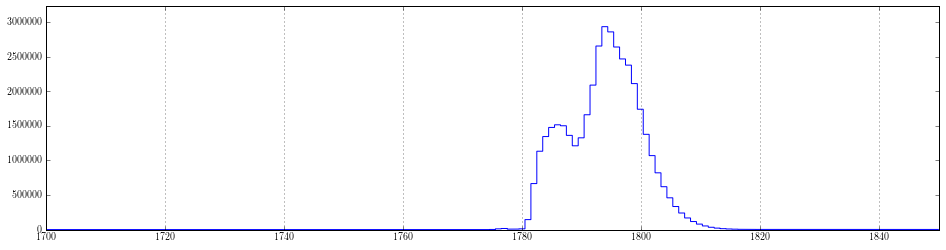

As a histogram:


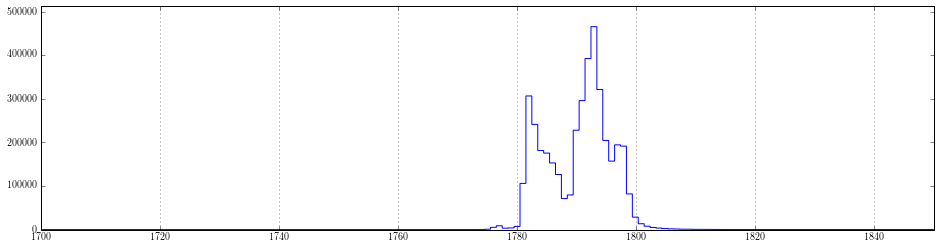

With 4 pixel threshold:


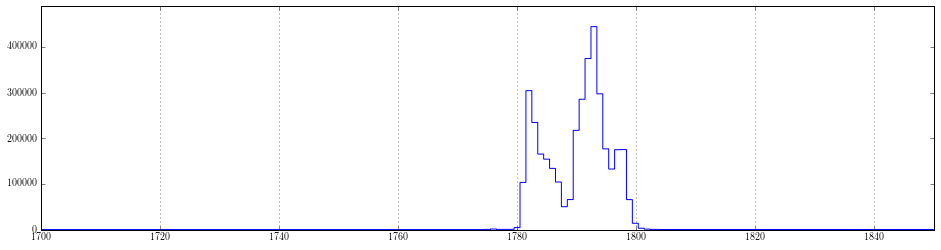

In [15]:
# range = [0,11810]
range = [1700,1850]

############
# for the raw spectrum:

y_rescale = 1.1 # big peak is too big, so clip y-axis by rescaling to this fraction of max
bins = min(int((max(raw_timecodes_ir)-min(raw_timecodes_ir)+1)),(range[1]-range[0]+1))
# print bins
fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)

# as a hist
print 'Raw timecodes a histogram:'
ys_ir, binEdges_ir, dummy1 = pl.hist(raw_timecodes_ir, bins=bins, range=range, histtype = 'step')
# bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
lims = pl.ylim()
pl.ylim([lims[0], y_rescale*max(ys_ir)])
# ax.set_xticks(ticks, minor=False)
# turn_raw, stat_raw, troughs_raw, peaks_raw = fn.GetTurningPoints(ys, bincenters, noise=20)
# ax.set_xticks(troughs_raw, minor=False)
ax.xaxis.grid(True, which='major')
pl.xlim(range[0],range[1])
pl.show()


############
# for the centroided spectrum:

y_rescale = 1.1 # big peak is too big, so clip y-axis by rescaling to this fraction of max
# bins = min(int((max(all_ts)-min(all_ts)+1)),(range[1]-range[0]+1))

fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)

# as a hist
print 'As a histogram:'
ys_ir, binEdges_ir, dummy1 = pl.hist(all_ts_ir, bins=bins, range=range, histtype = 'step')

# bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
# turn_cent, stat_cent, troughs_cent, peaks_cent = fn.GetTurningPoints(ys, bincenters, noise=1)
lims = pl.ylim()
pl.xlim(range[0],range[1])
pl.ylim([lims[0], y_rescale*max(ys_ir)])
# ax.set_xticks(troughs_cent, minor=False)
ax.xaxis.grid(True, which='major')
pl.show()

# as a hist
fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)
print 'With 4 pixel threshold:'
ys_ir, binEdges_ir, dummy1 = pl.hist(all_ts_4pix_ir, bins=bins, range=range, histtype = 'step')

# bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
# turn_cent, stat_cent, troughs_cent, peaks_cent = fn.GetTurningPoints(ys, bincenters, noise=0)
lims = pl.ylim()
pl.xlim(range[0],range[1])
pl.ylim([lims[0], y_rescale*max(ys_ir)])
# ax.set_xticks(troughs_cent, minor=False)
ax.xaxis.grid(True, which='major')
pl.show()


In [ ]:
for t, y in zip(binEdges_ir,ys_ir):
    print t, y

In [ ]:
bands = []
# # for i in xrange(len(troughs_cent)-1):
# #     bands.append((troughs_cent[i],troughs_cent[i+1]))
# # print bands
# bands.append([0,250])

# bands.append([900,910])
# bands.append([910,920])
# bands.append([920,930])
# bands.append([930,940])
# bands.append([940,950])
# bands.append([950,1000])
# bands.append([1000,1200])

bands.append([1820,1860])


In [ ]:
#probably don't need to rerun this, and it takes ages, so don't do it by accident:
if True: 
    import time
    now = time.time()
    n_bunches = 999999

    images_ir = [np.zeros((256,256), dtype = np.float64) for _ in bands]
    for i, t_range in enumerate(bands):
        print 'Processing band %s of %s'%(i+1, len(bands))
        for bunchID in sorted(tp_data_ir.keys())[:min(n_bunches,tp_data_ir.keys())]:
            for x,y,t,npix in zip(tp_data_ir[bunchID]['xs'],
                                  tp_data_ir[bunchID]['ys'],
                                  tp_data_ir[bunchID]['ts'],
                                  tp_data_ir[bunchID]['npixs']):
                if t >= t_range[0] and t<t_range[1]:
                    images_ir[i] += fn.makeGaussian(256,1,1,[x,y])
#                     images_ir[i] += fn.makeGaussian(256,1,(npix**.5)/1.5,[x,y])

    print 'Took %.1f secs'%(time.time()-now)


In [97]:
print len(tp_data_ir.keys())

200000


In [103]:
#probably don't need to rerun this, and it takes ages, so don't do it by accident:
bands = []
bands.append([1760,1820])

import time
now = time.time()
n_bunches = 9999999

images_ir = [np.zeros((256,256), dtype = np.float64) for _ in bands]
for i, t_range in enumerate(bands):
    print 'Processing band %s of %s'%(i+1, len(bands))
    for bunchnum, bunchID in enumerate(sorted(tp_data_ir.keys())[:min(n_bunches,tp_data_ir.keys())]):
        if bunchnum%1000==0: print bunchnum; sys.stdout.flush()
        for x,y,t,npix in zip(tp_data_ir[bunchID]['xs'],
                              tp_data_ir[bunchID]['ys'],
                              tp_data_ir[bunchID]['ts'],
                              tp_data_ir[bunchID]['npixs']):
#             if npix <= 3: continue
            if t >= t_range[0] and t<t_range[1]:
#                 images_ir[i][y][x] += 1
                images_ir[i] += fn.makeGaussian(256,1,1,[x,y])
#                     images_ir[i] += fn.makeGaussian(256,1,(npix**.5)/1.5,[x,y])

print 'Took %.1f secs'%(time.time()-now)


Processing band 1 of 1
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
15500

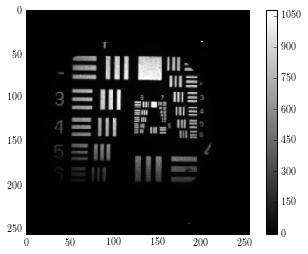

In [104]:
DisplayImage(np.rot90(images_ir[0],3), cmap='gray', vmax=np.percentile(images_ir[0],99.9), savefig='/Users/mfisherlevine/Desktop/usaf_allpix_gaus.pdf')#, vmax=150)

In [64]:
def DisplayImage(image, vmin=None, vmax=None, cmap='jet', title = '', savefig=''):
    import numpy as np
    fig = pl.figure()#figsize = [10,10])
    ax = fig.add_subplot(111)
#     xsize, ysize = image.shape
#     ax.set_xlim([0,YMAX])
#     ax.set_ylim([0,XMAX])

    if vmax == 'auto':
        element = (256*256) - 200
        tmp = image.flatten()
        tmp.sort()
        vmax = tmp[element]
        vmin = tmp[200]
        print 'Auto vmax = %s, real max = %s'%(vmax, np.max(image))

    if vmin == 'auto':
        tmp = image.flatten()
        vmin = min(_ for _ in tmp if _ > 0)
        print 'Auto vmin = %s'%vmin

    im = ax.imshow(image, vmin=vmin, vmax=vmax, cmap=cmap, interpolation='nearest')
    ax.set_title(title)
    fig.colorbar(im)
    if savefig: fig.savefig(savefig)
    return im

In [152]:
#probably don't need to rerun this, and it takes ages, so don't do it by accident:
bands = []
bands.append([1760,1820])

import time
now = time.time()
n_bunches = 999999999999

rebin_factor = 1.
outlist = []

images_ir = [np.zeros((256*rebin_factor,256*rebin_factor), dtype = np.float64) for _ in bands]
for i, t_range in enumerate(bands):
    print 'Processing band %s of %s'%(i+1, len(bands))
    for bunchID in sorted(tp_data_ir.keys())[:min(n_bunches,tp_data_ir.keys())]:
        for x,y,t,npix in zip(tp_data_ir[bunchID]['xs'],
                              tp_data_ir[bunchID]['ys'],
                              tp_data_ir[bunchID]['ts'],
                              tp_data_ir[bunchID]['npixs']):
            if npix <= 3: continue
            if t >= t_range[0] and t<t_range[1]:
                line = str(x) + '\t' + str(y) + '\t' + str(t) + '\n'
                outlist.append(line)
                images_ir[i][np.floor(y)][np.floor(x)] += 1
#             break

#                 images_ir[i] += fn.makeGaussian(256,1,1,[x,y])
#                     images_ir[i] += fn.makeGaussian(256,1,(npix**.5)/1.5,[x,y])

print 'Took %.1f secs'%(time.time()-now)


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Processing band 1 of 1
Took 36.8 secs


In [155]:
print len(outlist)

outfile = '/Users/mfisherlevine/Desktop/outfile.txt'
f = open(outfile, mode='w')

for line in outlist:
    f.write(line)
f.close()

3688165


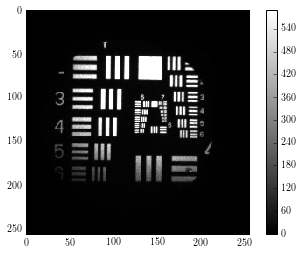

In [139]:
DisplayImage(np.rot90(images_ir[0],3), cmap='gray', vmax=np.percentile(images_ir[0],97), savefig='/Users/mfisherlevine/Desktop/usaf_rebin_2.pdf')#, vmax=150)

In [130]:
images_ir_raw = np.zeros((256,256), dtype = np.float64)

import time
now = time.time()
n_bunches = 9999999

for filenum, filename in enumerate(tp_datafiles_ir[:min(n_bunches,tp_data_ir.keys())]):
    if filenum%1000==0: print filenum; sys.stdout.flush()
    xs, ys, ts = fn.GetXYTarray_SingleFile(filename)
    for x,y in zip(xs, ys):
        images_ir_raw[x][y] += 1
#     break
print 'Took %.1f secs'%(time.time()-now)





#     for bunchID in sorted(tp_data_ir.keys())[:min(n_bunches,tp_data_ir.keys())]:
#         for x,y,t,npix in zip(tp_data_ir[bunchID]['xs'],
#                               tp_data_ir[bunchID]['ys'],
#                               tp_data_ir[bunchID]['ts'],
#                               tp_data_ir[bunchID]['npixs']):
#             if npix <= 3: continue
#             if t >= t_range[0] and t<t_range[1]:
#                 images_ir[i][y*rebin_factor][x*rebin_factor] += 1

# #                 images_ir[i] += fn.makeGaussian(256,1,1,[x,y])
# #                     images_ir[i] += fn.makeGaussian(256,1,(npix**.5)/1.5,[x,y])

# print 'Took %.1f secs'%(time.time()-now)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


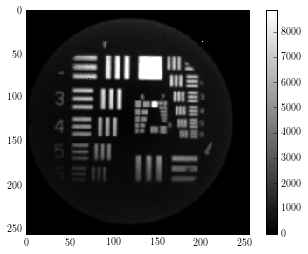

In [132]:
DisplayImage(np.rot90(images_ir_raw,3), cmap='gray', vmax=np.percentile(images_ir_raw,99.), savefig='/Users/mfisherlevine/Desktop/usaf_raw.pdf')#, vmax=150)

In [ ]:
#### pickle the bands and their images
pickle_filename = '/Users/mfisherlevine/Desktop/desy/pickles/run'+run_id+'_VMIs.pickle'

if False: #C areful, this will overwrite the good pickles if you accidentally run it!
    pickle_file = open(pickle_filename, 'wb')
    pickle.dump([bands, images], pickle_file)
    pickle_file.close()


#### Load the bands and their images from the pickle:
if True:
    print 'Unpickling...'; sys.stdout.flush()
    pickle_file = open(pickle_filename, 'rb')
    [bands, images] = pickle.load(pickle_file)
    pickle_file.close()
    print 'Loaded bands and images'

In [ ]:
from collections import defaultdict
time_matrix = defaultdict(lambda  : defaultdict(list))
time_matrix[0][0].append('s1')


In [ ]:
thr = 0.001
n_bunches = 10000

from collections import defaultdict
time_matrix = defaultdict(lambda  : defaultdict(list))

now = time.time()
tmp_img = np.zeros((256,256), dtype = np.float64)
for bunchID in sorted(tp_data_ir.keys())[:min(n_bunches,tp_data_ir.keys())]:
    for x,y,t,npix in zip(tp_data_ir[bunchID]['xs'],
                          tp_data_ir[bunchID]['ys'],
                          tp_data_ir[bunchID]['ts'],
                          tp_data_ir[bunchID]['npixs']):
        tmp_img = fn.makeGaussian(256,1,1,[x,y])
#         tmp_img = fn.makeGaussian(256,1,(npix**.5)/1.5,[x,y])
        pixels = np.where(tmp_img>=thr)
        for (x,y) in zip(pixels[0],pixels[1]):
            time_matrix[x][y].append((t, tmp_img[x][y]))

            
print 'Took %.1f secs'%(time.time()-now)


In [ ]:
print time_matrix[100][150]


In [ ]:
# def time_from_tuple_list(data):
#     multiplier = 100
#     temp = np.asarray(data)
#     xs = temp[:,0]
#     ys = temp[:,1]
#     tmp = []
#     for i in xrange(len(xs)):
#         weight = int(ys[i]*multiplier)
#         for _ in xrange(weight):
#             tmp.append(xs[i])
#     return np.mean(np.asarray(tmp)), np.std(np.asarray(tmp))

def std_custom(data, t_zero=917):
    multiplier = 100
    temp = np.asarray(data)
    xs = temp[:,0]
    ys = temp[:,1]
    del temp
    npts = 0.
    sum_2 = 0.
    for i in xrange(len(xs)):
        if xs[i] > t_zero + 500: continue
        weight = int(ys[i]*multiplier)
        for _ in xrange(weight):
#             print xs[i]
#             break
            sum_2 += (xs[i] - t_zero)**2
            npts += 1.
    if npts ==0: return 0
    return (float(sum_2) / float(npts))**.5

test = time_matrix[150][101]
# print test
std = std_custom(test)
print std

In [ ]:
print len(time_matrix[100][100])

In [ ]:
fn.DisplayImage(time_matrix_npts_image_std, vmax=150)

In [ ]:
time_matrix_npts_image_mean = np.zeros((256,256), dtype = np.float64)
time_matrix_npts_image_std = np.zeros((256,256), dtype = np.float64)

for x in xrange(256):
    print x
    for y in xrange(256):
        if len(time_matrix[x][y])<=5: continue
        if time_matrix[x][y]:
#             mean, std = time_from_tuple_list(time_matrix[x][y])
#             time_matrix_npts_image_mean[x][y] = mean
#             time_matrix_npts_image_std[x][y] = std

            std = std_custom(time_matrix[x][y])
            time_matrix_npts_image_std[x][y] = std

        else:
            time_matrix_npts_image[x][y] = np.nan

        
# fn.DisplayImage(time_matrix_npts_image_mean)#, vmax='auto')
fn.DisplayImage(time_matrix_npts_image_std)#, vmax='auto')

In [ ]:
print len(time_matrix[155][155])

In [ ]:
xs, ys = [], []
# for (x,y) in time_matrix[155][100]:
for (x,y) in time_matrix[100][150]:
#     if x<700: continue
#     if x >1200:continue
    xs.append(x)
    ys.append(y)
pl.plot(xs,ys,'o')
# a,b,c = pl.hist(xs, np.append(np.arange(min(xs), min(xs) + 200, 1),np.arange(min(xs)+200, max(xs) +50, 50)))
# a,b,c = pl.hist(xs,10)
# print np.append(np.arange(min(xs), min(xs) + 200, 1),np.arange(min(xs)+200, max(xs) +50, 50))

In [ ]:
# def func(x, a, t0, tc1, tc2):
def func(x, a, t0):

    # amplitude, t0, tc1, tc2
#     return a * (np.exp((t0 - x)/tc1) - np.exp((t0 - x)/tc2))
    return a * np.exp(-x/t0)

# popt, pcov = curve_fit(func, xdata, ydata)
p0 = [2,900]#,0.0001,0.0002]
params, pcov = curve_fit(func, xs, ys, p0=p0)
print params

pl.plot(xs,ys,'o')
pl.plot(np.linspace(0, 12000, 100),
        [func(_,params[0],params[1]) for _ in np.linspace(0,12000,100)],
#         [func(_,params[0],params[1],params[2],params[3]) for _ in np.linspace(0,12000,100)],
        'o')




In [ ]:
pl.plot(xs,ys,'o')
pl.plot(np.linspace(0, 12000, 100),[func(_,params[0],params[1],params[2],params[3]) for _ in np.linspace(0,12000,100)], 'o')

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = y + 0.2 * np.random.normal(size=len(xdata))

popt, pcov = curve_fit(func, xdata, ydata)

pl.plot(np.linspace(0, 5, 50),ydata, 'o')
pl.plot(np.linspace(0, 5, 50),[func(_,popt[0],popt[1],popt[2]) for _ in np.linspace(0,5,50)], 'o')
pl.show()

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
fn = reload(fn)
cmap = 'gray' ### beware using the de facto standard 'jet',

### but it's also replotted below for people who can't live without it
for i, image in enumerate(images_ir):
    title = 'IR image for times %s to %s ns(band #%s)'%(bands[i][0],bands[i][1], i)
    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto',savefig='/Users/mfisherlevine/Desktop/new_USAF_IR_'+str(i)+'.pdf')
    pl.show()

    

In [ ]:
fn = reload(fn)
cmap = 'jet'
for i, image in enumerate(images):
    title = 'VMI for times %s to %s (band %s)'%(bands[i][0],bands[i][1], i)
    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
    pl.show()

In [ ]:
cmap = 'jet'
image = images[27].copy()
fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
pl.show()

import scipy.ndimage as im_process
from scipy.ndimage.filters import gaussian_filter


deriv = im_process.sobel(gaussian_filter(image,3), mode='constant')
fn.DisplayImage(deriv, cmap=cmap, title=title,vmax='auto')
pl.show()

deriv[abs(deriv)<10]=0
fn.DisplayImage(deriv, cmap=cmap, title=title,vmax='auto')
pl.show()

deriv=abs(deriv/abs(deriv))
fn.DisplayImage(deriv, cmap=cmap, title=title)
pl.show()



In [ ]:
from skimage import feature

fn = reload(fn)
cmap = 'jet'
for i, image in enumerate(images):
    image = image.copy()
    if i!=27: continue
#     title = 'Fit to VMI for times %s to %s (band %s)'%(bands[i][0],bands[i][1], i)
    title = 'Band %s'%i

    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
#     image[image < 0.8*np.max(image)] = 0
    image[image < np.percentile(image,97)] = 0

    pl.show()
    
#     edges = feature.canny(image, sigma=3)

    edges = feature.blob_dog(image)
    fn.DisplayImage(edges, cmap=cmap, title=title)
    pl.show()

#     feature.
#     x,y,r = FitCircle(deriv)
#     DisplayImageWithFit(deriv,x,y,r,title=title)
    
#     pl.show()

In [ ]:
fn = reload(fn)
cmap = 'jet'
for i, image in enumerate(images):
#     if i!=3: continue
#     title = 'Fit to VMI for times %s to %s (band %s)'%(bands[i][0],bands[i][1], i)
    title = 'Band %s'%i

    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
    import scipy.ndimage as im_process
    from scipy.ndimage.filters import gaussian_filter

    deriv = im_process.laplace(gaussian_filter(image,2), mode='constant')
#     title += ' gaus, laplace'
#     fn.DisplayImage(deriv, cmap=cmap, title=title)
#     pl.show()

    deriv[deriv < np.percentile(deriv,99.7)] = 0

    title += ' 99.7th percentile cut'
    fn.DisplayImage(deriv, cmap=cmap, title=title)
    pl.show()

    deriv=abs(deriv/abs(deriv))
#     title += ', normed'
#     fn.DisplayImage(deriv, cmap=cmap, title=title)
#     pl.show()

    x,y,r = FitCircle(deriv)
    DisplayImageWithFit(deriv,x,y,r,title=title)
    
    pl.show()

In [ ]:
x,y,r = FitCircle(deriv)
x_circ, y_circ = MakeCirlePointsFromXYR(x,y,r)

In [ ]:
def MakeCirlePointsFromXYR(x, y, r, npts=180):
    theta_fit = np.linspace(-np.pi, np.pi, npts)
    xs = x + r*np.cos(theta_fit)
    ys = y + r*np.sin(theta_fit)
    return xs, ys

In [ ]:
fig = pl.figure(figsize = [10,10])
ax = fig.add_subplot(111)
# ax.set_xlim([YMIN,YMAX])
# ax.set_ylim([XMIN,XMAX])

# if vmax == 'auto':
#     element = (256*256) - 200
#     tmp = image.flatten()
#     tmp.sort()
#     vmax = tmp[element]
#     vmin = tmp[200]
#     print 'Auto vmax = %s, real max = %s'%(vmax, np.max(image))

# if vmin == 'auto':
#     tmp = image.flatten()
#     vmin = min(_ for _ in tmp if _ > 0)
#     print 'Auto vmin = %s'%vmin

im = ax.imshow(deriv)#, vmin=vmin, vmax=vmax, cmap=cmap)
pl.plot(y,x, 'x', ms=15)
pl.plot(y_circ, x_circ, 'r-.')#, label=method_3, lw=2)
ax.set_title(title)
fig.colorbar(im)


In [ ]:
def DisplayImageWithFit(image, x, y, r, vmin=None, vmax=None, cmap='jet', title = ''):
    import numpy as np
    fig = pl.figure(figsize = [10,10])
    ax = fig.add_subplot(111)
    ax.set_xlim([0,255])
    ax.set_ylim([0,255])

    if vmax == 'auto':
        element = (256*256) - 200
        tmp = image.flatten()
        tmp.sort()
        vmax = tmp[element]
        vmin = tmp[200]
        print 'Auto vmax = %s, real max = %s'%(vmax, np.max(image))

    if vmin == 'auto':
        tmp = image.flatten()
        vmin = min(_ for _ in tmp if _ > 0)
        print 'Auto vmin = %s'%vmin

    im = ax.imshow(image, vmin=vmin, vmax=vmax, cmap=cmap)
    
    pl.plot(y,x, 'xb', ms=15) # x on the centre
    x_circ, y_circ = MakeCirlePointsFromXYR(x,y,r) #generate circle points
    pl.plot(y_circ, x_circ, 'r-.', lw=4) #plot circle
    ax.set_title(title)
    fig.colorbar(im)
    return im

In [ ]:
def FitCircle(data):
    import numpy as np
    from scipy import odr

    x,y = np.where(data>=0)
#     x = np.r_[  9, 35, -13,  10,  23,   0]
#     y = np.r_[ 34, 10,   6, -14,  27, -10]
    
    x_m = np.mean(x)
    y_m = np.mean(y)
    
    method_3  = "odr"

    import functools
    def countcalls(fn):
        "decorator function count function calls "

        @functools.wraps(fn)
        def wrapped(*args):
            wrapped.ncalls +=1
            return fn(*args)

        wrapped.ncalls = 0
        return wrapped
    
    @countcalls
    def calc_R(xc, yc):
        """ calculate the distance of each 2D points from the center (xc, yc) """
        return np.sqrt((x-xc)**2 + (y-yc)**2)

    @countcalls
    def f_3(beta, x):
        """ implicit definition of the circle """
        return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

    # initial guess for parameters
    R_m = calc_R(x_m, y_m).mean()
    beta0 = [ x_m, y_m, R_m]

    # for implicit function :
    #       data.x contains both coordinates of the points
    #       data.y is the dimensionality of the response
    lsc_data   = odr.Data(np.row_stack([x, y]), y=1)
    lsc_model  = odr.Model(f_3, implicit=True)
    lsc_odr    = odr.ODR(lsc_data, lsc_model, beta0)
    lsc_out    = lsc_odr.run()

    xc_3, yc_3, R_3 = lsc_out.beta
    Ri_3       = calc_R(xc_3, yc_3)
    residu_3   = sum((Ri_3 - R_3)**2)
    residu2_3  = sum((Ri_3**2-R_3**2)**2)
    ncalls_3   = f_3.ncalls

    # == METHOD 3b ==
    # Advanced usage, with jacobian
    method_3b  = "odr with jacobian"
    print "\nMethod 3b : ", method_3b

    @countcalls
    def f_3b(beta, x):
        """ implicit definition of the circle """
        return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

    @countcalls
    def jacb(beta, x):
        """ Jacobian function with respect to the parameters beta.
        return df_3b/dbeta
        """
        xc, yc, r = beta
        xi, yi    = x

        df_db    = np.empty((beta.size, x.shape[1]))
        df_db[0] =  2*(xc-xi)                     # d_f/dxc
        df_db[1] =  2*(yc-yi)                     # d_f/dyc
        df_db[2] = -2*r                           # d_f/dr

        return df_db

    @countcalls
    def jacd(beta, x):
        """ Jacobian function with respect to the input x.
        return df_3b/dx
        """
        xc, yc, r = beta
        xi, yi    = x

        df_dx    = np.empty_like(x)
        df_dx[0] =  2*(xi-xc)                     # d_f/dxi
        df_dx[1] =  2*(yi-yc)                     # d_f/dyi

        return df_dx


    def calc_estimate(data):
        """ Return a first estimation on the parameter from the data  """
        xc0, yc0 = data.x.mean(axis=1)
        r0 = np.sqrt((data.x[0]-xc0)**2 +(data.x[1] -yc0)**2).mean()
        return xc0, yc0, r0

    # for implicit function :
    #       data.x contains both coordinates of the points
    #       data.y is the dimensionality of the response
    lsc_data  = odr.Data(np.row_stack([x, y]), y=1)
    lsc_model = odr.Model(f_3b, implicit=True, estimate=calc_estimate, fjacd=jacd, fjacb=jacb)
    lsc_odr   = odr.ODR(lsc_data, lsc_model)    # beta0 has been replaced by an estimate function
    lsc_odr.set_job(deriv=3)                    # use user derivatives function without checking
    lsc_odr.set_iprint(iter=1, iter_step=1)     # print details for each iteration
    lsc_out   = lsc_odr.run()

    xc_3, yc_3, R_3 = lsc_out.beta
    Ri_3       = calc_R(xc_3, yc_3)
    residu_3   = sum((Ri_3 - R_3)**2)
    residu2_3  = sum((Ri_3**2-R_3**2)**2)
    ncalls_3   = f_3.ncalls

    print "\nFunctions calls : f_3b=%d jacb=%d jacd=%d" % (f_3b.ncalls, jacb.ncalls, jacd.ncalls)

    
#     def PlotAll():
#         f = pl.figure( facecolor='white')  #figsize=(7, 5.4), dpi=72,
#         pl.axis('equal')

#         theta_fit = np.linspace(-np.pi, np.pi, 180)

#         x_fit3 = xc_3 + R_3*np.cos(theta_fit)
#         y_fit3 = yc_3 + R_3*np.sin(theta_fit)
#         pl.plot(x_fit3, y_fit3, 'r-.', label=method_3, lw=2)

#         pl.plot(xc_3, yc_3, 'x', ms=10)
        
#         pl.plot(x, y, 'o', label='data', ms=3)#, mec='b', mew=1)
#         pl.show()
    
#     PlotAll()

    return xc_3, yc_3, R_3

        
FitCircle(deriv)


In [ ]:
# Snippet for examples of annotating images (not mine):

# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

# ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

In [ ]:
# Snippet to text out luminance balancing of colour maps:
image = np.zeros((256,256), dtype = np.float)
a = fn.makeGaussian(256,1500,50,[100,100])
image += a
print np.max(a)
fn.DisplayImage(image, cmap='jet')
fn.DisplayImage(image, cmap='gray')
fn.DisplayImage(image, cmap='winter')
fn.DisplayImage(image, cmap='cubehelix')

In [ ]:
#     PEAK_SETTINGS_CENTROIDED = {}
#     PEAK_SETTINGS_CENTROIDED['vector'] = global_TOF_centroided
#     PEAK_SETTINGS_CENTROIDED['widths'] = np.asarray([3])
#     PEAK_SETTINGS_CENTROIDED['min_snr']    = [0.015]
#     PEAK_SETTINGS_CENTROIDED['noise_perc'] = [0.0001]

#     peaks_centroided = findpeaks( **PEAK_SETTINGS_CENTROIDED)

#     if fig is None:
#         print 'declared new fig'
#         fig = pl.figure(figsize=[16,8])
#     ax_cent = pl.subplot(212)
#     ax_raw  = pl.subplot(211, sharex=ax_cent)
#     tof1 = ax_cent.plot(range(11810),global_TOF_centroided)
#     tof2 =  ax_raw.plot(range(11810),global_TOF)
#     ax_cent.set_ylim([0,max(global_TOF_centroided[TOF_TMIN:TOF_TMAX])])
#     ax_raw.set_ylim([0,max(global_TOF[TOF_TMIN:TOF_TMAX])])
#     ax_cent.set_xlim([TOF_TMIN,TOF_TMAX])
#     ax_raw.set_xlim([TOF_TMIN,TOF_TMAX])
#     if flip:
#         ax_cent.set_xlim(ax_cent.get_xlim()[::-1])
#     ax_cent.set_title('ToF Centroided')

#     FilterPeaks()
#     print 'Centroided peaks found at %s'%peaks_centroided[::-1]
#     print '       Raw peaks found at %s'%peaks_raw[::-1]

#     if ax_cent is not None:
#         for peak in peaks_centroided:
#             ax_cent.plot([peak, peak], [0, ax_cent.get_ylim()[1]], color='k', linestyle='--', linewidth=1)

#     for peak in peaks_raw:
#         ax_raw.plot([peak, peak], [0, ax_raw.get_ylim()[1]], color='k', linestyle='--', linewidth=1)

#     ax_raw.set_title('ToF RAW')

# #     f.savefig(out_path + 'ToF.png')
#     pl.show()

#     return ax_raw, ax_cent


# def FilterPeaks():
#     import operator
#     search_range = 5
#     cent_threshold = len(tp_data) / 10
#     raw_threshold = len(loaded_fileNAMES) * 2
#     global peaks_centroided
#     global peaks_raw
#     new_peaks_centroided = []
#     new_peaks_raw = []

#     for peak in peaks_centroided:
#         _min = max(peak - search_range, 0)
#         _max = min(peak + search_range, len(global_TOF_centroided))
#         index, maxval = max(enumerate(global_TOF_centroided[_min:_max]), key=operator.itemgetter(1))
#         if maxval >= cent_threshold:
#             new_peaks_centroided.append(_min+index)

#     for peak in peaks_raw:
#         _min = max(peak - search_range, 0)
#         _max = min(peak + search_range, len(global_TOF))
#         index, maxval = max(enumerate(global_TOF[_min:_max]), key=operator.itemgetter(1))
#         if maxval >= raw_threshold:
#             new_peaks_raw.append(_min+index)

#     peaks_centroided = new_peaks_centroided
#     peaks_raw = new_peaks_raw